# Program Script Examples 

The ```Underwriter``` class stores the dictionary definitions of all the elements it creates in ```portfolio```, ```aggreate``` and ```severity``` member dictionaries. These can be accessed directly or used to create a new object. It does not cache actual instances.

By convention name Portfolios in ALL~CAPS, aggregates in CamelCase and severity in lowerCase.

```python
    uw = Underwriter()
    # create objects
    
    # access underlying dictionary definitions
    kind, dict_obj = uw['name']
    
    # create (new) instance 
    new_obj = uw('name')
    
```

There is a lot of flexibility creating portfolios

```python
    port = agg.Portfolio('myNewPortfolioName', [list of: dictionary specs, existing agg objects, names known to uw])
    # eg
    port = agg.Portfolio('newPortfolio', [ 'Agg2', 
                                          uw['Agg2'][1],
                                          uw('Agg2'), 
                                          test['AggA'], 
                                          dict(name='I=OnTheFly', exp_en=1, sev_name='lognorm', sev_a=.5, 
                                               sev_wt=1, sev_scale=10, sev_loc=2, freq_name='poisson')])
    
```

In [1]:
import sys
sys.path.append('c:/s/telos/python')
sys.path.append('c:/s/telos/python/aggregate_project')

import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import scipy.stats as ss
import pandas as pd
import warnings
import logging

from importlib import reload
from IPython.core.display import HTML

import aggregate as agg
import importlib

%matplotlib widget

sns.set('paper', 'ticks', 'plasma', 'serif')
sns.set_palette('muted', 8)
%config InlineBackend.figure_format = 'svg'

np.set_printoptions(linewidth=200)
pd.set_option('max_colwidth', 140)

# warnings
# warnings.simplefilter('error')
# warnings.simplefilter('ignore')

logging.getLogger("matplotlib").setLevel(logging.CRITICAL)

def newobs():
    _ = agg.read_log()
    return _.loc[_.log.str.startswith("creating new"), :]

In [2]:
uw = agg.Underwriter()
test = uw(
f'''
port AGG_TYPES
    agg Agg1 1 claim sev {10*np.exp(-.3**2/2)} * lognorm .3 fixed
    agg Agg2 1 claim sev {10*np.exp(-.3**2/2)} * lognorm .3 + 5 fixed
    agg Agg3 1 claim sev 10 * lognorm 0.5 cv .3 fixed
    agg Agg4 1 claim sev 10 * lognorm 1 cv .5 + 5 fixed
    
port AGG_TYPES_2
    agg Agg5 1 claim sev 10 * gamma .3 fixed
    agg Agg6 1 claim sev 10 * gamma .3 + 5 fixed
    
agg AggA 1 claim sev 2 * pareto 1.6 - 2 fixed
agg AggB 1 claim sev 2 * uniform 5 + 5 fixed

sev sevX 1000 * pareto 2.5 - 1000
''', create_all=True)

c:/s/telos/python/aggregate_project\aggregate\utils.py:707: RuntimeWarning: invalid value encountered in sqrt
  sd = np.sqrt(var)
C:\Users\steve\Anaconda3\envs\Working_Duplicate\lib\site-packages\scipy\stats\_distn_infrastructure.py:871: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
C:\Users\steve\Anaconda3\envs\Working_Duplicate\lib\site-packages\scipy\stats\_distn_infrastructure.py:2022: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0) & (loc == loc)


In [3]:
test

{'AGG_TYPES': <aggregate.port.Portfolio object at 0x0000019A5C159FC8>, { 'name': 'AGG_TYPES', 'spec': [{'name': 'Agg1', 'note': ''}, {'name': 'Agg2', 'note': ''}, {'name': 'Agg3', 'note': ''}, {'name': 'Agg4', 'note': ''}]},
 'AGG_TYPES_2': <aggregate.port.Portfolio object at 0x0000019A5FD4D0C8>, { 'name': 'AGG_TYPES_2', 'spec': [{'name': 'Agg5', 'note': ''}, {'name': 'Agg6', 'note': ''}]},
 'Agg1': <aggregate.distr.Aggregate object at 0x0000019A5FE96648> name: Agg1,
 'Agg2': <aggregate.distr.Aggregate object at 0x0000019A5FE96BE8> name: Agg2,
 'Agg3': <aggregate.distr.Aggregate object at 0x0000019A5FE962E8> name: Agg3,
 'Agg4': <aggregate.distr.Aggregate object at 0x0000019A5FE96E88> name: Agg4,
 'Agg5': <aggregate.distr.Aggregate object at 0x0000019A5FE96EE8> name: Agg5,
 'Agg6': <aggregate.distr.Aggregate object at 0x0000019A5FE967C8> name: Agg6,
 'AggA': <aggregate.distr.Aggregate object at 0x0000019A5FEC5A08> name: AggA,
 'AggB': <aggregate.distr.Aggregate object at 0x0000019A5FEC

In [4]:
uw['AggB']

('agg',
 {'name': 'AggB',
  'exp_en': 1.0,
  'sev_name': 'uniform',
  'sev_a': 5.0,
  'sev_wt': 1,
  'sev_scale': 2.0,
  'sev_loc': 5.0,
  'freq_name': 'fixed',
  'note': ''})

In [14]:
for a in test['AGG_TYPES'].agg_list:
    print(a)

Aggregate: Agg1
	EN=1.0, CV(N)=0.000
	1 severity, EX=10.0, ' CV(X)=0.307
	EA=10.0, CV=0.307
Aggregate: Agg2
	EN=1.0, CV(N)=0.000
	1 severity, EX=15.0, ' CV(X)=0.205
	EA=15.0, CV=0.205
Aggregate: Agg3
	EN=1.0, CV(N)=0.000
	1 severity, EX=5.0, ' CV(X)=0.300
	EA=5.0, CV=0.300
Aggregate: Agg4
	EN=1.0, CV(N)=0.000
	1 severity, EX=15.0, ' CV(X)=0.333
	EA=15.0, CV=0.333


In [29]:
# create an object (not a stored object)
uw('sevX')

<aggregate.distr.Severity object at 0x00000224ADC38BE0> of type pareto

In [30]:
# dictionary of all aggregates created is uw.aggregate
uw.list().tail()

,Portfolio,Aggregate,Severity
40,,a,
41,,b,
42,,c,
43,,quake,
44,,wind,


In [31]:
# more detail 
uw.describe().tail(20)

,Type,Severity,ESev,Sev_a,Sev_b,EN,Freq_a,ELoss,Notes
Name,,,,,,,,,
Agg1,aggregate,lognorm,0.0,0.3,0,1,0.0,0,
Agg2,aggregate,lognorm,0.0,0.3,0,1,0.0,0,
Agg3,aggregate,lognorm,5.0,0.0,0,1,0.0,0,
Agg4,aggregate,lognorm,10.0,0.0,0,1,0.0,0,
Agg5,aggregate,gamma,0.0,0.3,0,1,0.0,0,
Agg6,aggregate,gamma,0.0,0.3,0,1,0.0,0,
AggA,aggregate,pareto,0.0,1.6,0,1,0.0,0,
AggB,aggregate,uniform,0.0,5.0,0,1,0.0,0,
directorsA,severity,lognorm,10000000.0,0.0,0,0,0.0,0,"directors and officers liability class a, sigma=1.25"


In [9]:
# now we can create a new portfolio - remeber uw[] returns (type, object)
# to create by name need to pass in the underwriter object 
port = agg.Portfolio('NEW_PORTFOLIO', [ 'Agg3', 
                                          uw['Agg2'][1],
                                          uw('AggB'), 
                                          test['AggA'], 
                                          dict(name='AggNew', exp_en=1, sev_name='lognorm', sev_a=.5, 
                                               sev_wt=1, sev_scale=10, sev_loc=2, freq_name='poisson')], uw=uw)

In [10]:
port

<aggregate.port.Portfolio object at 0x00000251131BB8C8>, { 'name': 'NEW_PORTFOLIO', 'spec': [{'name': 'Agg3', 'note': ''}, {'name': 'Agg2', 'note': ''}, {'name': 'AggB', 'note': ''}, {'name': 'AggA', 'note': ''}, {'name': 'AggNew', 'note': ''}]}

In [11]:
port.recommend_bucket()

,bs10,bs11,bs12,bs13,bs14,bs15,bs16,bs17,bs18,bs19,bs20
line,,,,,,,,,,,
Agg3,0.011586,0.005793,0.002897,0.001448,0.000724,0.000362,0.000181,0.000091,0.000045,0.000022,0.000011
Agg2,0.028476,0.014238,0.007119,0.003559,0.001780,0.000890,0.000445,0.000222,0.000111,0.000055,0.000028
AggB,0.007602,0.003801,0.001900,0.000950,0.000475,0.000238,0.000119,0.000059,0.000030,0.000015,0.000007
AggA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AggNew,0.088240,0.044120,0.022060,0.011030,0.005515,0.002758,0.001379,0.000689,0.000345,0.000171,0.000086
total,0.135904,0.067952,0.033976,0.016988,0.008494,0.004247,0.002123,0.001062,0.000531,0.000264,0.000133


In [15]:
port.update(log2=16, bs=.0025, remove_fuzz=True, add_exa=True)

In [16]:
port

,Agg2,Agg3,AggA,AggB,AggNew,total
"(freq, mean)",1,1,1,1,1,5
"(freq, cv)",0,0,0,0,1,0.2
"(freq, skew)",NaN,NaN,NaN,NaN,1,1
"(sev, mean)",15,5,3.33333,6,13.3315,8.53296
"(sev, cv)",0.204586,0.3,NaN,0.096225,0.452988,0.561567
"(sev, skew)",0.949535,0.927,NaN,1.73085e-10,1.75019,4.58235
"(agg, mean)",15,5,3.33333,6,13.3315,42.6648
"(agg, cv)",0.204586,0.3,NaN,0.096225,1.09782,0.315989
"(agg, skew)",0.949535,0.927,NaN,1.7338e-10,1.34404,1.95657
Mean,15,5,3.33333,6,13.3315,42.6648


In [44]:
port.audit_df.T

,Agg2,Agg3,AggA,AggB,AggNew,total
Mean,15,5,3.33333,6,13.3315,42.6648
CV,0.204586,0.3,NaN,0.096225,1.09782,0.315989
Skew,0.949535,0.927,NaN,1.7338e-10,1.34404,1.95657
Limit,inf,inf,inf,inf,inf,inf
P99.9Est,29.1589,11.8641,0,7.78415,90.3583,126.004
Sum log,1,1,1,1,1,0.999479
EmpMean,15,5,2.96102,6,13.3314,42.1968
EmpCV,0.204586,0.3,2.46144,0.0962252,1.0978,0.389177
EmpSkew,0.949535,0.927,9.09196,-2.95366e-13,1.34373,1.41542
EmpEX1,15,5,2.96102,6,13.3314,42.1968


In [15]:
port.plot(subplots=True, height=3)

NameError: name 'port' is not defined

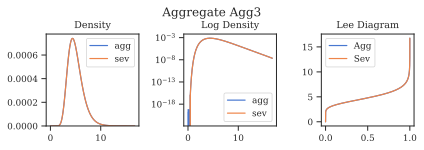

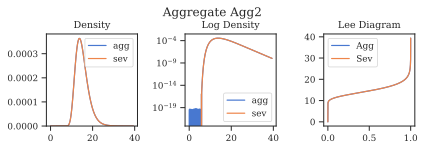

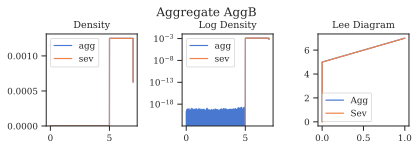

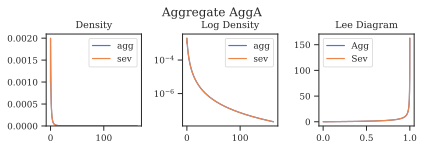

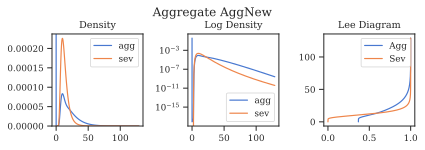

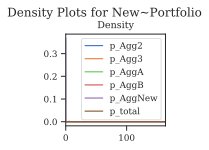

In [53]:
warnings.simplefilter("ignore")
for a in port.agg_list:
    a.plot()
port.plot()

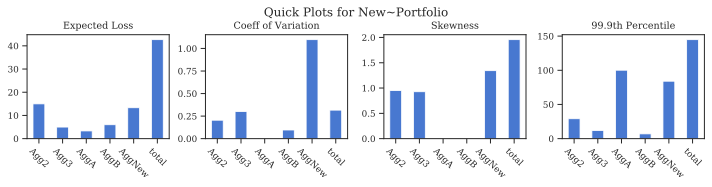

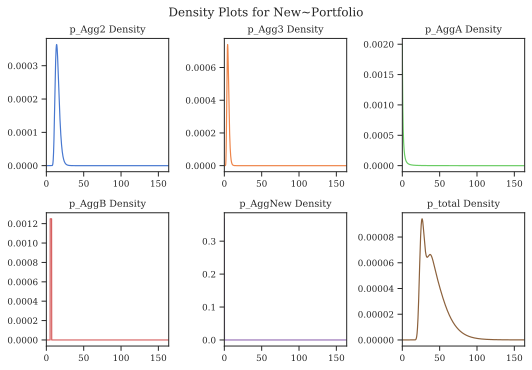

In [63]:
port.plot('quick', height=2.5)
port.plot(subplots=True, height=2.5)

In [ ]:
uw.describe()

In [12]:
import sys
sys.path.append('c:/s/telos/python')
sys.path.append('c:/s/telos/python/aggregate_project')

from IPython.core.display import HTML

import aggregate as agg
import numpy as np
import matplotlib.pyplot as plt


In [13]:
%matplotlib widget

In [16]:
# uw able to use meta construction 
uw = agg.Underwriter(glob=globals())

In [17]:
test_string_0 = """
# use to create sev and aggs so can illustrate use of sev. and agg. below 

sev sev1 lognorm 10 cv .3

agg Agg0 1 claim sev lognorm 10 cv .09 fixed

"""

test_string_1 = f'''
agg Agg1  1 claim sev {10*np.exp(-.3**2/2)} * lognorm .3      fixed note{{sigma=.3 mean=10}}
agg Agg2  1 claim sev {10*np.exp(-.3**2/2)} * lognorm .3 + 5  fixed note{{shifted right by 5}}''' \
'''
agg Agg3  1 claim sev 10 * lognorm 0.5 cv .3                  fixed note{mean 0.5 scaled by 10 and cv 0.3}
agg Agg4  1 claim sev 10 * lognorm 1 cv .5 + 5                fixed note{shifted right by 5}

agg Agg5  1 claim sev 10 * gamma .3                           fixed note{gamma distribution....can use any two parameter scipy.stats distribution plus expon, uniform and normal}
agg Agg6  1 claim sev 10 * gamma 1 cv .3 + 5                  fixed note{mean 10 x 1, cv 0.3 shifted right by 5}
    
agg Agg7  1 claim sev 2 * pareto 1.6 - 2                      fixed note{pareto alpha=1.6 lambda=2}
agg Agg8  1 claim sev 2 * uniform 5 + 2.5                     fixed note{uniform 2.5 to 12.5}

agg Agg9  1 claim 10 x  2 sev lognorm 20 cv 1.5               fixed note{10 x 2 layer, 1 claim}
agg Agg10 10 loss 10 xs 2 sev lognorm 20 cv 1.5               fixed note{10 x 2 layer, total loss 10, derives requency}
agg Agg11 14 prem at .7    10 x 1 sev lognorm 20 cv 1.5       fixed note{14 prem at .7 lr derive frequency}
agg Agg11 14 prem at .7 lr 10 x 1 sev lognorm 20 cv 1.5       fixed note{14 prem at .7 lr derive frequency, lr is optional}

agg Agg12: 14 prem at .7 lr (10 x 1) sev (lognorm 20 cv 1.5)  fixed note{trailing semi and other punct ignored};

agg Agg13: 1 claim sev 50 * beta 3 2 + 10 fixed note{scaled and shifted beta, two parameter distribution}
agg Agg14: 1 claim sev 100 * expon + 10   fixed note{exponential single parameter, needs scale, optional shift}
agg Agg15: 1 claim sev 10 * norm + 50     fixed note{normal is single parameter too, needs scale, optional shift}

# any scipy.stat distribution taking one parameter can be used; only cts vars supported on R+ make sense  
agg Agg16: 1 claim sev 1 * invgamma 4.07 fixed  note{inverse gamma distribution}

# mixtures
agg MixedLine1: 1 claim 25 xs 0 sev lognorm 10                   cv [0.2, 0.4, 0.6, 0.8, 1.0] wts=5             fixed note{equally weighted mixture of 5 lognormals different cvs}
agg MixedLine2: 1 claim 25 xs 0 sev lognorm [10, 15, 20, 25, 50] cv [0.2, 0.4, 0.6, 0.8, 1.0] wts=5             fixed note{equal weighted mixture of 5 lognormals different cvs and means}
agg MixedLine3: 1 claim 25 xs 0 sev lognorm 10                   cv [0.2, 0.4, 0.6, 0.8, 1.0] wt [.2, .3, .3, .15, .05]   fixed note{weights scaled to equal 1 if input}

# limit profile
agg LimitProfile1: 1 claim [1, 5, 10, 20] xs 0 sev lognorm 10 cv 1.2 wt [.50, .20, .20, .1]   fixed note{maybe input EL by band for wt}
agg LimitProfile2: 5 claim            20  xs 0 sev lognorm 10 cv 1.2 wt [.50, .20, .20, .1]   fixed note{input EL by band for wt}
agg LimitProfile3: [10 10 10 10] claims [inf 10 inf 10] xs [0 0 5 5] sev lognorm 10 cv 1.25   fixed note{input counts directly}

# limits and distribution blend
agg Blend1 50  claims [5 10 15] x 0         sev lognorm 12 cv [1, 1.5, 3]          fixed note{options all broadcast against one another, 50 claims of each}
agg Blend2 50  claims [5 10 15] x 0         sev lognorm 12 cv [1, 1.5, 3] wt=3     fixed note{options all broadcast against one another, 50 claims of each}

agg Blend5cv1  50 claims  5 x 0 sev lognorm 12 cv 1 fixed
agg Blend10cv1 50 claims 10 x 0 sev lognorm 12 cv 1 fixed
agg Blend15cv1 50 claims 15 x 0 sev lognorm 12 cv 1 fixed

agg Blend5cv15  50 claims  5 x 0 sev lognorm 12 cv 1.5 fixed
agg Blend10cv15 50 claims 10 x 0 sev lognorm 12 cv 1.5 fixed
agg Blend15cv15 50 claims 15 x 0 sev lognorm 12 cv 1.5 fixed

# semi colon can be used for newline and backslash works
agg Blend5cv3  50 claims  5 x 0 sev lognorm 12 cv 3 fixed; agg Blend10cv3 50 claims 10 x 0 sev lognorm 12 cv 3 fixed
agg Blend15cv3 50 claims 15 x 0 sev \
lognorm 12 cv 3 fixed

# not sure if it will broadcast limit profile against severity mixture... 
agg LimitProfile4: [10 30 15 5] claims [inf 10 inf 10] xs [0 0 5 5] sev lognorm 10 cv [1.0, 1.25, 1.5] wts=3  fixed note{input counts directly}
''' \
f'''
# the logo
agg logo 1 claim {np.linspace(10, 250, 20)} xs 0 sev lognorm 100 cv 1 fixed'''

test_string_2 = '''
# empirical distributions 
agg dHist1 1 claim sev dhistogram xps [1, 10, 40] [.5, .3, .2] fixed     note{discrete histogram}
agg cHist1 1 claim sev chistogram xps [1, 10, 40] [.5, .3, .2] fixed     note{continuous histogram, guessed right hand endpiont}
agg cHist2 1 claim sev chistogram xps [1 10 40 45] [.5 .3 .2]  fixed     note{continuous histogram, explicit right hand endpoint, don't need commas} 
agg BodoffWind  1 claim sev dhistogram xps [0,  99] [0.80, 0.20] fixed   note{examples from Bodoffs paper}
agg BodoffQuake 1 claim sev dhistogram xps [0, 100] [0.95, 0.05] fixed

# set up fixed sev for future use
sev One dhistogram xps [1] [1]   note{a certain loss of 1}
'''

test_string_3 = '''
# sev, agg and port: using built in objects [have to exist prior to running program]
agg ppa:       0.01 * agg.PPAL       note{this is using lmult on aggs, needs a dictionary specification to adjust means}
agg cautoQS:   1e-5 * agg.CAL        note{lmult is quota share or scale for rmul see below }
agg cautoClms: agg.CAL * 1e-5        note{rmult adjusts the claim count}

# scaling works with distributions already made by uw
agg mdist: 5000 * agg.dHist1

'''

test_string_4 = '''
# frequency options 
agg FreqFixed      10 claims sev sev.One fixed
agg FreqPoisson    10 claims sev sev.One poisson                   note{Poisson frequency}
agg FreqBernoulli  .8 claims sev sev.One bernoulli               note{Bernoulli en is frequency }
agg FreqBinomial   10 claims sev sev.One binomial 0.5
agg FreqPascal     10 claims sev sev.One pascal .8 3 

# mixed freqs 
agg FreqNegBin     10 claims sev sev.One (mixed gamma 0.65)     note{gamma mixed Poisson = negative binomial}
agg FreqDelaporte  10 claims sev sev.One mixed delaporte .65 .25
agg FreqIG         10 claims sev sev.One mixed ig  .65  
agg FreqSichel     10 claims sev sev.One mixed delaporte .65 -0.25
agg FreqSichel.nb  10 claims sev sev.One mixed delaporte .65 .25
agg FreqSichel.ig  10 claims sev sev.One mixed delaporte .65 .25
agg FreqBeta       10 claims sev sev.One mixed beta .5  4  note{second param is max mix}
'''
test_strings = [test_string_0, test_string_1, test_string_2, test_string_3, test_string_4]
test_strings = [test_string_2, test_string_3, test_string_4][-1:]

In [18]:
# uw = agg.Underwriter()
uw.glob = globals()
uw.create_all = True 
uw.update = True
uw.log2 = 8
uw.bs = 1
ans = {}
# pd.set_option('max_colwidth', 100)
# makes we have this
uw('sev One dhistogram xps [1] [1]   note{a certain loss of 1}')
for i, t in enumerate(test_strings):
    print(f'line {i} of {len(test_strings)}')
    # write test just parses, does not create anything; returns three pandas dfs with helpful information
#     for a in uw.write_test(t):
#         if a is not None:
#             display(a)
    ans.update(uw(t, log2=8, bs=1))

line 0 of 1


c:/s/telos/python/aggregate_project\aggregate\utils.py:912: RuntimeWarning: invalid value encountered in sqrt
  sd = np.sqrt(ex2 - ex1 ** 2)


In [19]:
ans

{'FreqFixed': <aggregate.distr.Aggregate object at 0x00000182967533A8> name: FreqFixed,
 'FreqPoisson': <aggregate.distr.Aggregate object at 0x000001829693BB28> name: FreqPoisson,
 'FreqBernoulli': <aggregate.distr.Aggregate object at 0x000001829694ECA8> name: FreqBernoulli,
 'FreqBinomial': <aggregate.distr.Aggregate object at 0x000001829694EB28> name: FreqBinomial,
 'FreqPascal': <aggregate.distr.Aggregate object at 0x00000182969A6048> name: FreqPascal,
 'FreqNegBin': <aggregate.distr.Aggregate object at 0x00000182969A6168> name: FreqNegBin,
 'FreqDelaporte': <aggregate.distr.Aggregate object at 0x00000182969A6D08> name: FreqDelaporte,
 'FreqIG': <aggregate.distr.Aggregate object at 0x00000182969A6348> name: FreqIG,
 'FreqSichel': <aggregate.distr.Aggregate object at 0x00000182969A63A8> name: FreqSichel,
 'FreqSichel.nb': <aggregate.distr.Aggregate object at 0x00000182969A6F48> name: FreqSichel.nb,
 'FreqSichel.ig': <aggregate.distr.Aggregate object at 0x0000018296A300A8> name: FreqS

In [21]:
qall(ans)

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,1.0,0.997485,-0.00251505,0.000000,0,,
Freq,10.0,,,0.316228,,,0.316228
Agg,10.0,9.95901,-0.00409932,0.316228,0.316035,-0.000610972,0.316228


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [14]:
qd(['FreqPoisson', 'FreqNegBin'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,1.0,0.997485,-0.00251505,0.000000,0,,
Freq,10.0,,,0.316228,,,0.316228
Agg,10.0,9.95901,-0.00409932,0.316228,0.316035,-0.000610972,0.316228


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,1.0,0.930018,-0.0699823,0.000000,0,,
Freq,10.0,,,0.722842,,,1.30734
Agg,10.0,9.28183,-0.0718172,0.722842,0.719157,-0.00509684,1.30734


In [20]:
def qd(l):
    # customized for freq plots
    for i in l:
        t = ans[i]
        plt.step(t.xs, t.agg_density, where='pre', label=i)
#         t.plot()
        display(t)
    plt.legend(loc='upper right')

def qall(ans):
    base = ans['FreqPoisson']
    display(base)
    for k, v in ans.items():
        if k != 'FreqPoisson':
#             display(v)
            plt.figure()
            plt.step(base.xs, base.agg_density, where='pre', alpha=0.5, label='Poisson')
            plt.step(v.xs, v.agg_density, where='pre', label=k)
            plt.legend(loc='upper right')

def qdl(l):
    for i in l:
        ans[i].plot('long')
        

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,0.400,,,0.500000,,,1.625
Freq,462316.420,,,0.240005,,,0.480
Agg,184926.568,184730,-0.00106167,0.240006,0.238075,-0.00804513,0.480


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,40000.000000,40000,-8.35419e-09,0.500000,0.500327,0.000654101,1.625000
Freq,4.623164,,,0.523357,,,0.633415
Agg,184926.568000,184411,-0.00278836,0.572693,0.569998,-0.00470662,0.770571


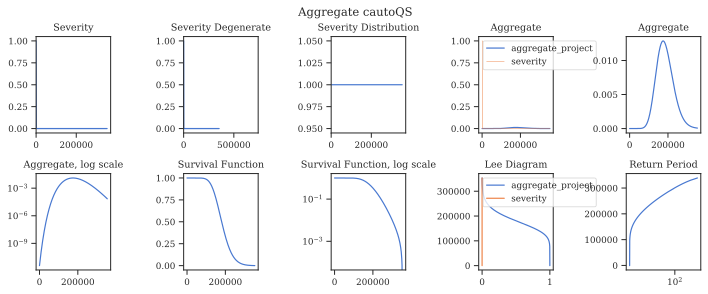

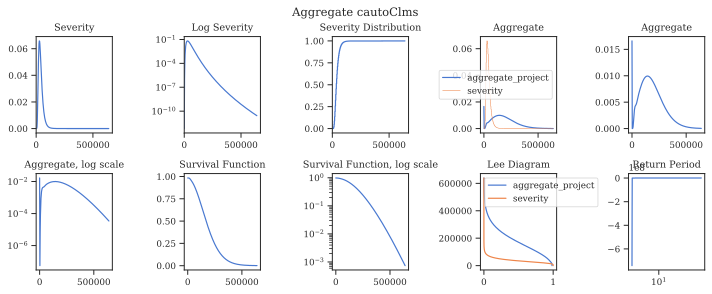

In [88]:
ans['cautoQS'] .plot('long')
display(ans['cautoQS'])

ans['cautoClms'] .plot('long')
display(ans['cautoClms'])

0.31622776601683794


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,1.0,0.997485,-0.00251505,0.000000,0,,
Freq,10.0,,,0.316228,,,0.316228
Agg,10.0,9.95901,-0.00409932,0.316228,0.316035,-0.000610972,0.316228


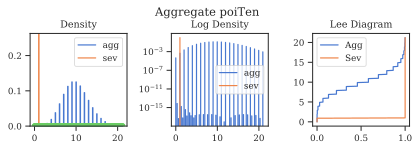

In [61]:
ans['poiTen'].plot()
print(np.sqrt(10)/10)
ans['poiTen']

Dictionary definition ('agg', {'name': 'cHist2', 'exp_en': 1.0, 'sev_name': 'chistogram', 'sev_xs': [1.0, 10.0, 40.0, 45.0], 'sev_ps': [0.5, 0.3, 0.2], 'freq_name': 'fixed', 'note': "continuous histogram, explicit right hand endpoint, don't need commas"})


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,18.75,18.75,-2.01681e-08,0.82383,0.82383,2.21587e-08,0.517366
Freq,1.00,,,0.00000,,,
Agg,18.75,18.75,-2.01681e-08,0.82383,0.82383,2.21587e-08,0.517366


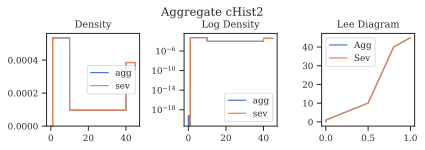

In [27]:
# refer to existing distribution in the underwriter
print(f"Dictionary definition {uw['cHist2']}")
agg_object = uw('cHist2')
agg_object.easy_update()
agg_object.plot()
agg_object

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,18.754813,18.7545,-1.53533e-05,0.823619,0.823664,5.43294e-05,0.517366
Freq,1.000000,,,0.000000,,,
Agg,18.754813,18.7545,-1.53533e-05,0.823619,0.823664,5.43294e-05,0.517366


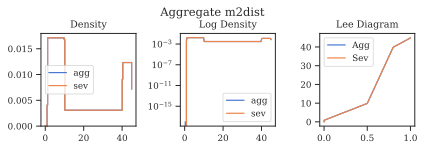

In [30]:
# once created existing variables can be used as severity
# must be updated
b = uw('agg m2dist: 1 claim sev meta.agg_object fixed '  \
       'note{can use meta to pull in other objects and use as severity}')
b.plot()
b

In [31]:
uw.describe('aggregate').tail()

,Type,Severity,ESev,Sev_a,Sev_b,EN,Freq_a,ELoss,Notes
Name,,,,,,,,,
cHist2,aggregate,chistogram,0,0.0,0.0,1,0.00,0.0,"continuous histogram, explicit right hand endpoint, don't need commas"
ppa,aggregate,lognorm,5e+09,0.0,0.0,5.67607e+06,0.08,0.0,"this is using lmult on aggs, needs a dictionary specification to adjust means"
cauto,aggregate,lognorm,4e+11,0.0,0.0,462316,0.24,0.0,
mdist,aggregate,dhistogram,0,0.0,0.0,1,0.00,0.0,
m2dist,aggregate,"Aggregate: cHist2\n\tEN=1.0, CV(N)=0.000\n\t1 severity, EX=18.8, ' CV(X)=0.824\n\tEA=18.8, CV=0.824",0,0.0,0.0,1,0.00,0.0,can use meta to pull in other objects and use as severity


In [41]:
uw.write_test("agg test 10 claims sev lognorm 12 cv .2 mixed gamma 0.12")[1]

,name,exp_en,sev_name,sev_mean,sev_cv,sev_wt,freq_name,freq_a,note,exp_el,exp_premium,exp_lr,exp_attachment,exp_limit,sev_a,sev_b,sev_scale,sev_loc,freq_b
test,test,10.0,lognorm,12.0,0.2,1,gamma,0.12,,0,0,0,0,inf,0,0,0,0,0


In [37]:
# create from dictionary defintion, remember uw[] returns (type, dict_def)
agg.Aggregate(**uw['PPAL'][1])

,E(X),CV(X),Skew(X)
X,,,
Sev,5.000000e+03,,
Freq,5.676073e+06,0.0800011,0.16
Agg,2.838037e+10,0.08,0.16


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,15.0,14.9833,-0.00111545,0.204586,0.201891,-0.0131705,0.949535
Freq,1.0,,,0.000000,,,
Agg,15.0,14.9833,-0.00111545,0.204586,0.201891,-0.0131705,0.949535


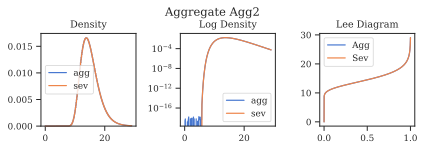

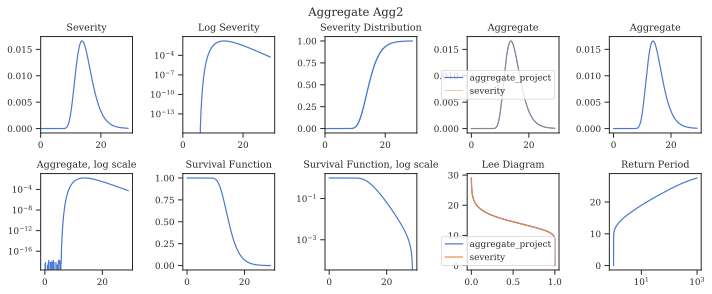

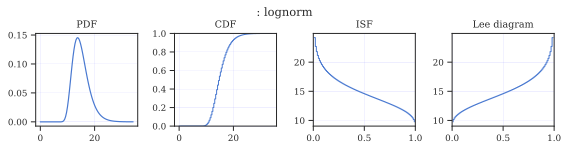

In [40]:
display(ans['Agg2'])
ans['Agg2'].plot()
ans['Agg2'].plot('long')
ans['Agg2'].sevs[0].plot()

In [44]:
for k, v in ans.items():
    display(v)

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,10.0,9.99628,-0.000372282,0.09,0.0893696,-0.00700468,0.270729
Freq,1.0,,,0.00,,,
Agg,10.0,9.99628,-0.000372282,0.09,0.0893696,-0.00700468,0.270729


<aggregate.distr.Severity object at 0x00000248DDCCD108> of type lognorm

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,10.0,9.98333,-0.00166658,0.306878,0.303013,-0.012596,0.949535
Freq,1.0,,,0.000000,,,
Agg,10.0,9.98333,-0.00166658,0.306878,0.303013,-0.012596,0.949535


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,15.0,14.9833,-0.00111545,0.204586,0.201891,-0.0131705,0.949535
Freq,1.0,,,0.000000,,,
Agg,15.0,14.9833,-0.00111545,0.204586,0.201891,-0.0131705,0.949535


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,5.0,4.99193,-0.00161433,0.3,0.296291,-0.0123627,0.927
Freq,1.0,,,0.0,,,
Agg,5.0,4.99193,-0.00161433,0.3,0.296291,-0.0123627,0.927


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,15.0,14.9653,-0.00231532,0.333333,0.326008,-0.0219762,1.625
Freq,1.0,,,0.000000,,,
Agg,15.0,14.9653,-0.00231532,0.333333,0.326008,-0.0219762,1.625


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.0,2.94696,-0.0176786,1.825742,1.77467,-0.0279731,3.65148
Freq,1.0,,,0.000000,,,
Agg,3.0,2.94696,-0.0176786,1.825742,1.77467,-0.0279731,3.65148


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,15.0,14.988,-0.000803243,0.2,0.198429,-0.00785316,0.6
Freq,1.0,,,0.0,,,
Agg,15.0,14.988,-0.000803243,0.2,0.198429,-0.00785316,0.6


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.333333,,,,,,
Freq,1.000000,,,0,,,
Agg,3.333333,,,,,,


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.5,3.49999,-1.49389e-06,0.164957,0.164973,9.26409e-05,6.30212e-08
Freq,1.0,,,0.000000,,,
Agg,3.5,3.49999,-1.49389e-06,0.164957,0.164973,9.26409e-05,6.30212e-08


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,7.213478,7.20956,-0.000542503,0.473296,0.473119,-0.00037473,-0.747492
Freq,1.000000,,,0.000000,,,
Agg,7.213478,7.20956,-0.000542503,0.473296,0.473119,-0.00037473,-0.747492


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,7.213478,7.2059,-0.00105047,0.473296,0.47295,-0.000731841,-0.747492
Freq,1.386294,,,0.000000,,,
Agg,10.000000,11.806,0.180601,0.401981,0.3273,-0.185782,-0.634861


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,7.378219,7.37802,-2.66092e-05,0.445700,0.445701,1.03386e-06,-0.809125
Freq,1.328234,,,0.000000,,,
Agg,9.800000,11.8641,0.210621,0.386728,0.298976,-0.226908,-0.702067


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,7.378219,7.37802,-2.66092e-05,0.445700,0.445701,1.03386e-06,-0.809125
Freq,1.328234,,,0.000000,,,
Agg,9.800000,11.8641,0.210621,0.386728,0.298976,-0.226908,-0.702067


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,40.0,40,-2.0447e-08,0.25,0.250008,3.1862e-05,-0.285714
Freq,1.0,,,0.00,,,
Agg,40.0,40,-2.0447e-08,0.25,0.250008,3.1862e-05,-0.285714


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,110.0,109.481,-0.00471965,0.909091,0.89585,-0.0145651,2
Freq,1.0,,,0.000000,,,
Agg,110.0,109.481,-0.00471965,0.909091,0.89585,-0.0145651,2


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,50.000001,49.9646,-0.000707823,0.2,0.199057,-0.0047157,4.1496e-06
Freq,1.000000,,,0.0,,,
Agg,50.000001,49.9646,-0.000707823,0.2,0.199057,-0.0047157,4.1496e-06


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,9.694565,9.69561,0.000107924,0.528278,0.528559,0.000530995,1.08221
Freq,1.000000,,,0.000000,,,
Agg,9.694565,9.69561,0.000107924,0.528278,0.528559,0.000530995,1.08221


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,16.368572,16.3539,-0.000897742,0.410691,0.409914,-0.00189311,0.0891558
Freq,1.000000,,,0.000000,,,
Agg,16.368572,16.3539,-0.000897742,0.410691,0.409914,-0.00189311,0.0891558


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,9.827352,9.82732,-3.17718e-06,0.476042,0.476048,1.18777e-05,1.10838
Freq,1.000000,,,0.000000,,,
Agg,9.827352,9.82732,-3.17718e-06,0.476042,0.476048,1.18777e-05,1.10838


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,4.956437,4.94187,-0.00293893,0.893798,0.902255,0.00946184,1.58518
Freq,4.000000,,,0.000000,,,
Agg,19.825746,19.7362,-0.00451893,0.446899,0.449828,0.00655426,0.79259


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,8.309808,8.32793,0.00218076,0.730605,0.733309,0.00370098,0.766311
Freq,5.000000,,,0.000000,,,
Agg,41.549040,41.5974,0.00116367,0.326737,0.327881,0.00350391,0.342705


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,7.992372,7.96306,-0.00366694,1.250214,1.25631,0.00487268,7.29539
Freq,40.000000,,,0.000000,,,
Agg,319.694885,317.708,-0.00621454,0.197676,0.197759,0.000416742,1.1535


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,5.641459,,,0.674079,,,0.897127
Freq,150.000000,,,0.000000,,,
Agg,846.218837,846.036,-0.000216437,0.055038,0.054703,-0.00609155,0.0732501


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,5.924155,,,0.679961,,,0.778987
Freq,150.000000,,,0.000000,,,
Agg,888.623281,888.43,-0.000217302,0.055519,0.0551842,-0.00602393,0.063604


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,4.539780,4.4243,-0.025437,0.210151,0.205653,-0.0214029,-2.10175
Freq,50.000000,,,0.000000,,,
Agg,226.989019,221.215,-0.025437,0.029720,0.0290837,-0.0214029,-0.297232


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,7.369538,7.42411,0.00740448,0.391871,0.398503,0.0169235,-0.611266
Freq,50.000000,,,0.000000,,,
Agg,368.476906,370.586,0.00572514,0.055419,0.0675622,0.219118,-0.0864461


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,8.996244,9.02463,0.0031552,0.517347,0.52236,0.00968888,0.0282896
Freq,50.000000,,,0.000000,,,
Agg,449.812205,450.474,0.00147034,0.073164,0.0821706,0.123102,0.00400075


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,4.083303,3.82487,-0.0632911,0.338548,0.32028,-0.0539584,-1.22112
Freq,50.000000,,,0.000000,,,
Agg,204.165138,191.243,-0.0632911,0.047878,0.0452945,-0.0539584,-0.172692


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,6.402077,6.66756,0.0414684,0.526193,0.551169,0.0474648,-0.243704
Freq,50.000000,,,0.000000,,,
Agg,320.103827,329.261,0.0286082,0.074415,0.127053,0.707363,-0.0344649


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,7.822173,7.99542,0.0221484,0.653459,0.673186,0.0301896,0.256843
Freq,50.000000,,,0.000000,,,
Agg,391.108644,397.987,0.0175865,0.092413,0.111004,0.201169,0.0363231


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.229376,3.10775,-0.0376612,0.569766,0.561391,-0.0147005,-0.366573
Freq,50.000000,,,0.000000,,,
Agg,161.468814,155.38,-0.03771,0.080577,0.0796166,-0.0119213,-0.0518413


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,4.892386,4.94674,0.0111093,0.768729,0.785905,0.0223441,0.289047
Freq,50.000000,,,0.000000,,,
Agg,244.619299,246.7,0.00850774,0.108715,0.118616,0.0910806,0.0408774


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,5.982520,5.93083,-0.00863931,0.903504,0.912216,0.00964306,0.678975
Freq,50.000000,,,0.000000,,,
Agg,299.125991,296.208,-0.00975511,0.127775,0.131483,0.0290256,0.0960216


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,7.78475,7.74612,-0.00496192,1.223805,1.23377,0.00814038,9.53179
Freq,60.00000,,,0.000000,,,
Agg,467.08501,463.695,-0.00725851,0.157993,0.159459,0.00928208,1.23055


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,67.354179,67.2031,-0.0022433,0.727474,0.730649,0.00436362,1.25864
Freq,20.000000,,,0.000000,,,
Agg,1347.083574,1342.12,-0.00368587,0.162668,0.165238,0.0158007,0.281441


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,11.499998,11.4391,-0.00529125,1.284634,1.28551,0.000680224,1.2561
Freq,1.000000,,,0.000000,,,
Agg,11.499998,11.4391,-0.00529125,1.284634,1.28551,0.000680224,1.2561


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,19.25,19.2497,-1.63376e-05,0.845021,0.845056,4.11037e-05,0.592361
Freq,1.00,,,0.000000,,,
Agg,19.25,19.2497,-1.63376e-05,0.845021,0.845056,4.11037e-05,0.592361


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,18.75,18.7497,-1.4723e-05,0.82383,0.823875,5.47437e-05,0.517366
Freq,1.00,,,0.00000,,,
Agg,18.75,18.7497,-1.4723e-05,0.82383,0.823875,5.47437e-05,0.517366


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.279875e+08,,,0.595015,,,-0.502325
Freq,5.676073e+06,,,0.080001,,,0.160000
Agg,1.861681e+15,1.86109e+15,-0.000316905,0.080001,0.0794888,-0.00640797,0.160000


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.062164e+11,,,0.224110,,,-1.129238
Freq,4.623164e+05,,,0.240005,,,0.480000
Agg,1.415689e+17,1.41419e+17,-0.00106167,0.240005,0.238074,-0.00804514,0.480000


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,11.499998,11.4391,-0.00529125,1.284634,1.28551,0.000680224,1.2561
Freq,1.000000,,,0.000000,,,
Agg,11.499998,11.4391,-0.00529125,1.284634,1.28551,0.000680224,1.2561


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,12.0,12.0001,6.31235e-06,0.300000,0.311555,0.038517,0.600000
Freq,50.0,,,0.142113,,,0.143492
Agg,600.0,599.032,-0.00161283,0.148310,0.151502,0.0215195,0.161661


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.742924,3.73351,-0.00251626,0.770578,0.781151,0.0137204,1.162266
Freq,50.000000,,,0.142113,,,0.143492
Agg,187.146200,186.372,-0.00413786,0.179086,0.181722,0.0147195,0.234015


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,12.0,11.8857,-0.00952839,1.300000,1.32345,0.0180398,2.600000
Freq,50.0,,,0.142113,,,0.143492
Agg,600.0,593.284,-0.0111928,0.232370,0.235528,0.0135904,0.378143


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,13.987908,13.8645,-0.0088233,0.741206,0.752893,0.0157669,0.373609
Freq,50.000000,,,0.198997,,,0.297491
Agg,699.395414,692.135,-0.0103809,0.224917,0.226368,0.00644848,0.326112


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,8.927683,0,-1,0.621116,,,-0.169527
Freq,15.000000,,,4.806939,,,9.600010
Agg,133.915243,0,-1,4.809614,,,9.600027


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,16.626589,16.6386,0.000719761,0.554485,0.554876,0.000705858,-0.489896
Freq,1.700000,,,0.766965,,,0.766965
Agg,28.265201,28.2025,-0.00221944,0.876978,0.873826,-0.00359385,0.943368


In [46]:
for k, v in ans.items():
    if type(v) == agg.Aggregate:
        print(k, v.recommend_bucket())
    

Agg0 0.012837814213558094
Agg1 0.023592721612794708
Agg2 0.028475534112802348
Agg3 0.011586055991367365
Agg4 0.04248502831112531
Agg5 0.04572335764492564
Agg6 0.026449805251184066
Agg7 0.0
Agg8 0.005165802595001878
Agg9 0.01734753776029515
Agg10 0.021896626202388893
Agg11 0.021007592184611283
Agg12 0.021007592184611283
Agg13 0.06924054913407975
Agg14 0.7169451064550036
Agg15 0.07900622477063735
MixedLine1 0.033650437347176834
MixedLine2 0.03712063640005828
MixedLine3 0.03188565194772151
LimitProfile1 0.057001925649843195
LimitProfile2 0.08842015843495357
LimitProfile3 0.6178875978739237
Blend1 0.9717546000865989
Blend2 1.0211018495729625
Blend5cv1 0.24202730934475342
Blend10cv1 0.4214661178007529
Blend15cv1 0.5387691261243077
Blend5cv15 0.2288790365404275
Blend10cv15 0.38448706907089514
Blend15cv15 0.49285633961490705
Blend5cv3 0.19694812646862372
Blend10cv3 0.3206657681256826
Blend15cv3 0.4126616921922993
LimitProfile4 0.8221988107755742
logo 2.0670977372167174
dHist1 0.08511270907345